# Machine Learning for Remote Sensing and GIS (GEOG-790-S3)
#### Course Instructor: Dr. Maitiniyazi Maimaitijiang, Department of Geography & Geospatial Sciences, SDSU

## Classical ML-based Regression Lab

## Learning Objectives:

* Understand what is regression? differences between regression and classification
* Understand classical ML algorithms and familiar with ML modules in skitimage library
* How to implement classical machine learning algorithms in remote sensing related regression problems

## Main Tasks

* Using hyperspectral data and Machine Learning methods to predict crop leaf chlorophyll content

## What to do/submit?
1. Fill the blank portions of the folloiwng scritp and submit a jupyter notebook file (*ipynb) to the dropbox in D2L system, the file name should be "FirstName_LastName_ML_based_Regression"
2. Calculate Model Evaluation Metrics using Excel for the resutls from Support Vector Regression Method, and submit your excel file (see the details at the end of this jupyter notebook)

## Background Story

* Refer to this publication about the details: https://www.mdpi.com/2072-4292/12/13/2082  
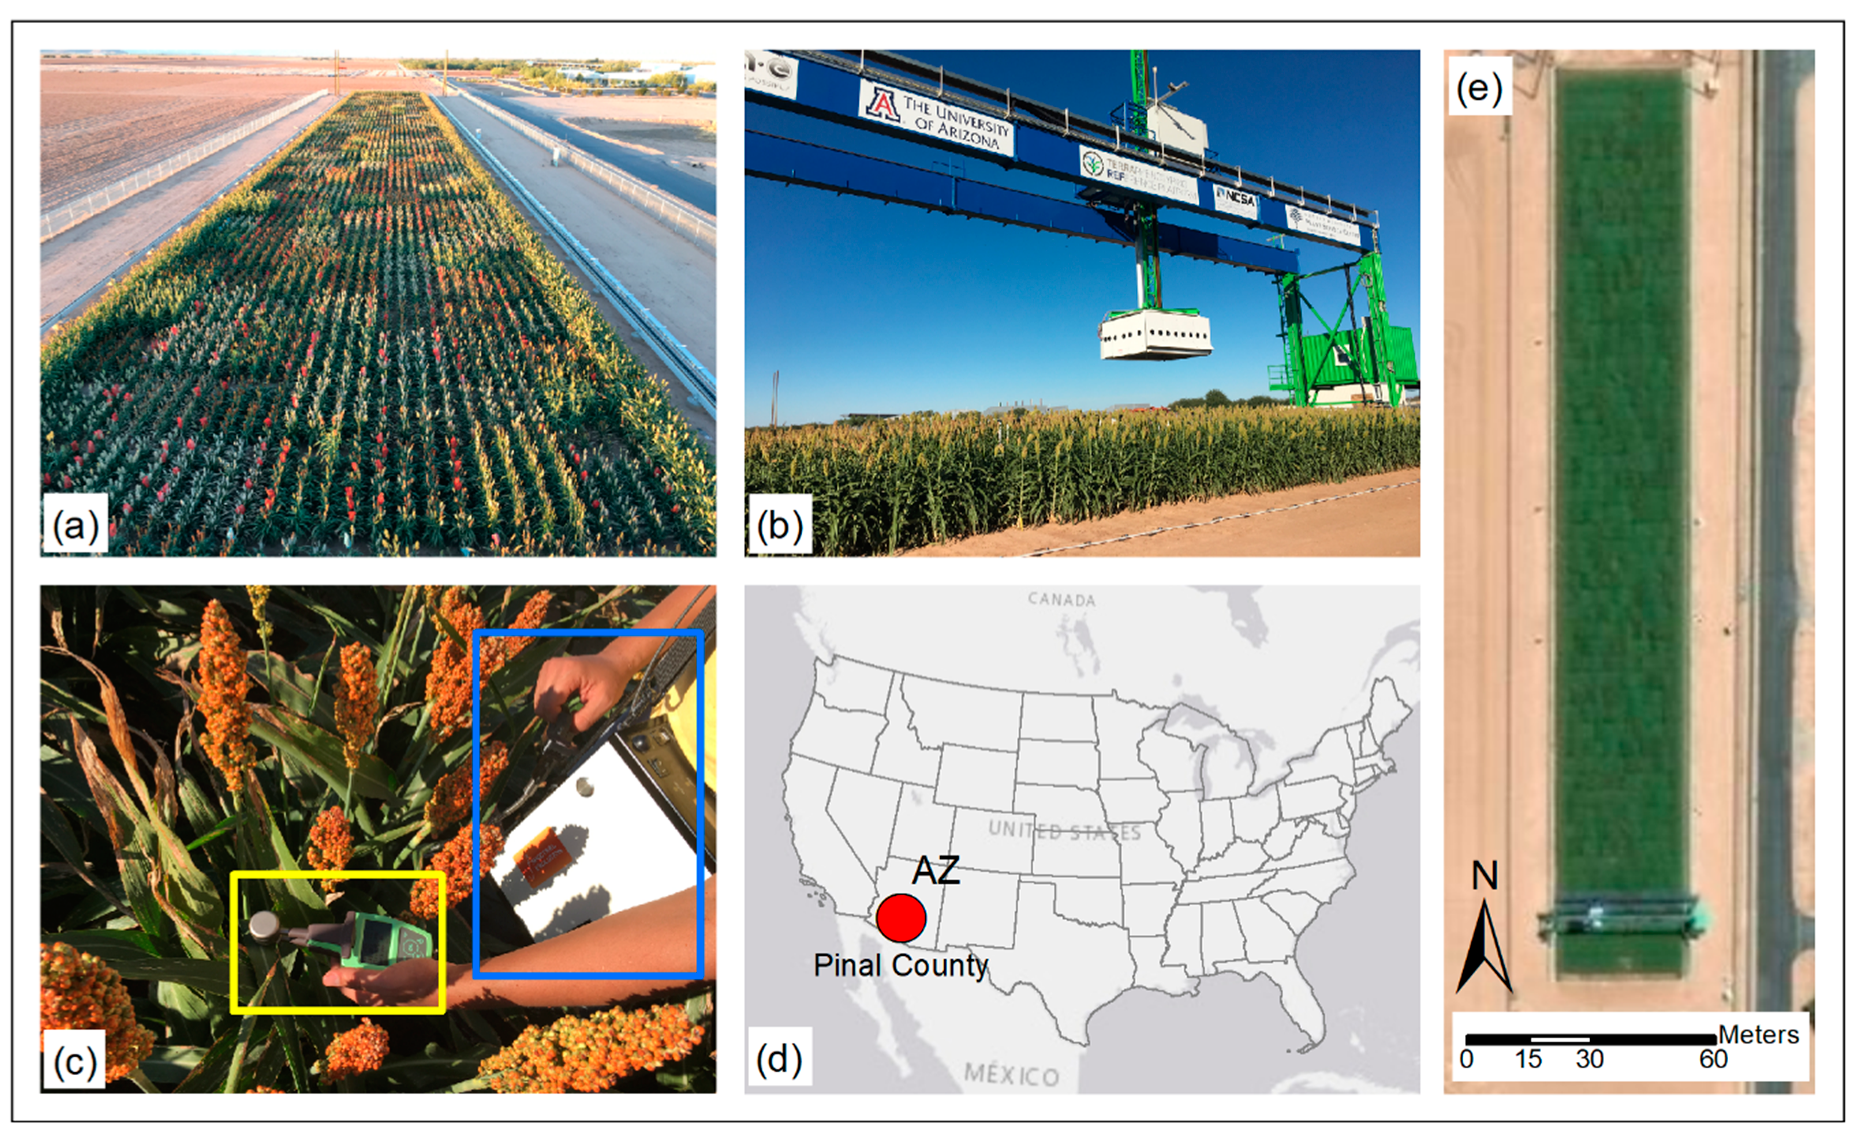
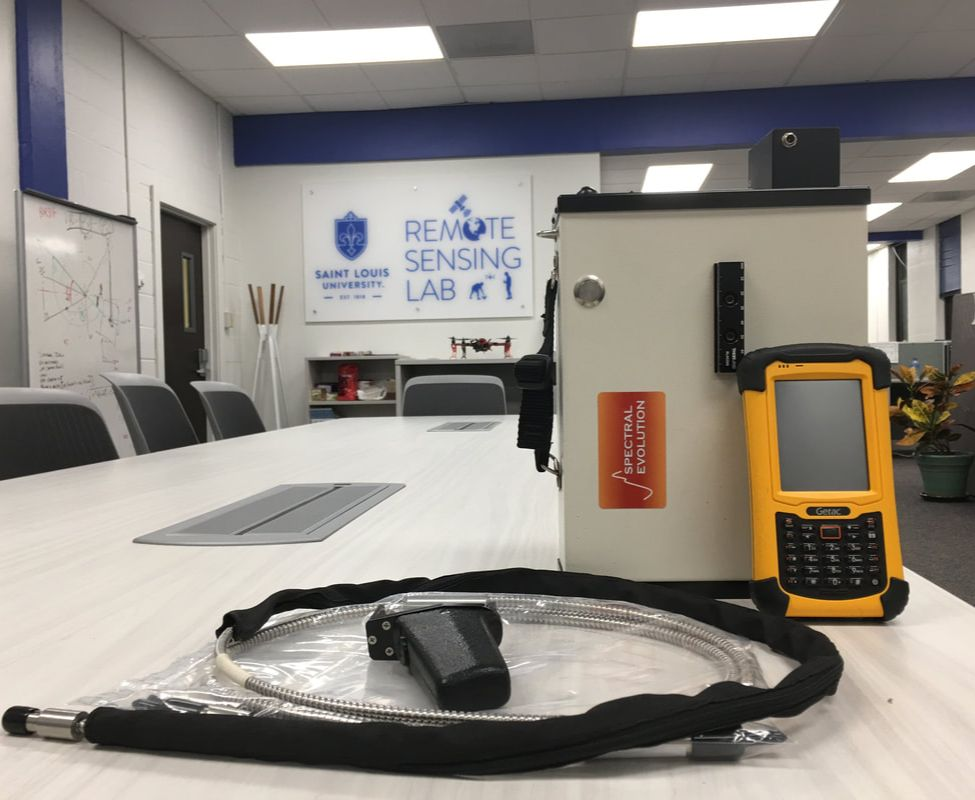
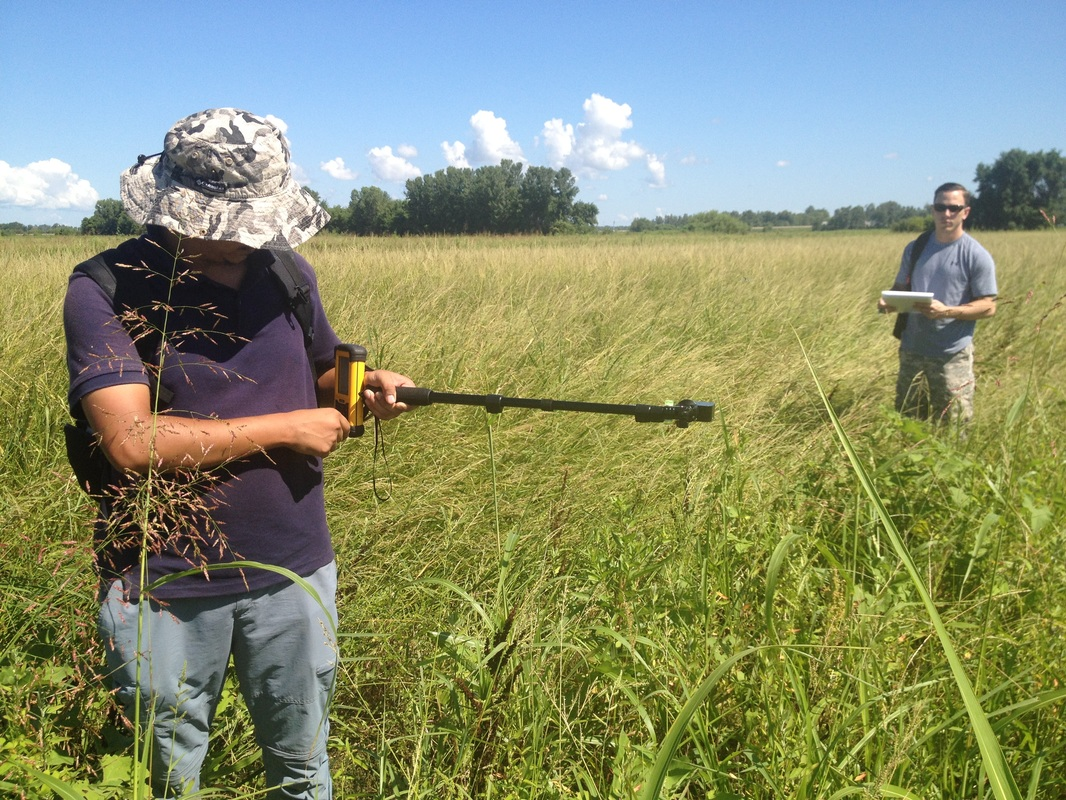
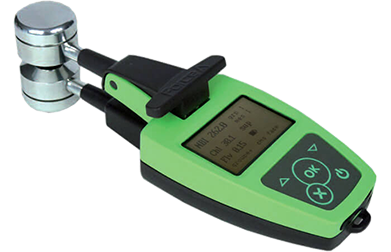


## 1. Import Lib

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import rasterio
from matplotlib import pyplot as plt

## 2. Load data and apply exploratory analysis

In [156]:
# Read data (Lab_4_data)
file = r'C:\Users\khuon\Downloads\Week5\Lab_4\Lab_4_data.xlsx'
df = pd.read_excel(file)
df


Plot_ID   LCC        350        351        352        353        354  \
0      M312  28.8  15.860227   9.774000  13.175862  13.428761   8.958094   
1      M015  30.8   9.529243   7.463000   9.941740  13.112441  17.321108   
2      M108  31.3  11.272360   7.143000  13.839225  15.791698  10.628365   
3      M134  32.1  22.599764  26.316000  28.736614  22.606449   3.649782   
4      M239  32.7  17.810272  23.684000  24.739620  21.312262  11.160262   
..      ...   ...        ...        ...        ...        ...        ...   
388    M383  66.6  31.363003  32.353001  25.213654  25.507263  36.950600   
389    M361  66.7   9.497987   6.098000  12.117977  15.296140  14.211473   
390    M157  67.3   8.923623   8.333000  10.789865  11.841606  10.785606   
391    M107  67.8  17.172911  26.471001  22.622265  19.672209  18.070210   
392    M243  70.3  35.964767  40.351002  41.074749  42.135921  43.703259   

           355        356        357  ...       2491       2492       2493  \
0    13.098701  16.494692  15.920308  ...  45.282684  40.607319  24.261955   
1    17.430378  18.501591  22.880409  ...   2.503524   3.889073   6.403220   
2    11.283675  12.128814  11.908186  ...  30.656300  33.531658  35.478973   
3    16.704529  26.689041  21.208958  ...   3.196046   3.158223   2.808670   
4    11.154676  13.389713  18.222286  ...  13.011713  15.151894  21.925680   
..         ...        ...        ...  ...        ...        ...        ...   
388  27.642174  19.400814  19.030186  ...  28.915920  26.213753  16.141254   
389  17.888584  20.399136  18.952864  ...  33.461838  26.506557  23.519674   
390  11.355556  10.979148   7.972852  ...   3.510967   3.933089   7.877268   
391  20.243788  20.509165  15.342836  ...   2.859045   6.671537  14.132611   
392  36.063831  35.380363  53.315636  ...   8.413729  14.137592  22.412775   

          2494       2495       2496       2497       2498       2499  \
0    14.021358  18.021902  21.902067  24.700001  27.497932  17.583925   
1     9.456512  13.767517  17.349646  14.379000  11.408355   8.270518   
2    35.828629  32.451283  28.807692  22.770500  16.733309  27.062237   
3     2.573274   2.604184   2.701835   3.399500   4.097165   4.098688   
4    29.189375  37.595924  44.133724  33.870998  23.608274  14.583553   
..         ...        ...        ...        ...        ...        ...   
388  10.881922  16.850691  23.692532  38.383499  53.074471  51.322460   
389  20.878263  19.042767  17.198421  15.274500  13.350580   9.290789   
390  11.460288  14.200804  16.515320  15.000000  13.484680   9.394204   
391  17.202238  10.027534   3.577051   3.637500   3.697949  11.813526   
392  28.306200  28.643480  27.819637  16.556999   5.294363   9.007355   

          2500  
0     6.255947  
1     5.114084  
2    39.211597  
3     4.022777  
4     5.696539  
..         ...  
388  47.741470  
389   4.993420  
390   5.017289  
391  20.825090  
392  14.386110  

[393 rows x 2153 columns]

In [6]:
# Compute the mean, max, min , median and Std values of LCC
LCC = df.iloc[:,1].values
Mean = np.mean(LCC)
Max = np.max(LCC)
Min = np.min(LCC)
Median = np.median(LCC)
Std = np.std(LCC)
print("Mean LCC value is",Mean)
print("Max LCC value is",Max)
print("Min LCC value is",Min)
print("Median LCC value is",Median)
print("Standard deviation LCC value is",Std)


Mean LCC value is 49.729262086514
Max LCC value is 70.3
Min LCC value is 28.8
Median LCC value is 50.1
Standard deviation LCC value is 7.55259311854295


In [7]:
# Get statistical values for each column
df.describe()


LCC         350         351         352         353         354  \
count  393.000000  393.000000  393.000000  393.000000  393.000000  393.000000   
mean    49.729262   18.537103   18.115799   17.918215   17.978751   18.426474   
std      7.562220    7.977884    8.658959    7.672780    7.711913    8.529685   
min     28.800000    3.972618    1.316000    3.292875    2.875440    3.649782   
25%     45.000000   13.055349   12.857000   12.935261   13.112441   12.936153   
50%     50.100000   17.782482   17.073000   16.903891   17.028481   16.804119   
75%     55.000000   21.740116   21.951000   21.266361   21.498960   22.737045   
max     70.300000   59.021408   67.647003   55.890797   49.147129   56.802532   

              355         356         357         358  ...        2491  \
count  393.000000  393.000000  393.000000  393.000000  ...  393.000000   
mean    18.532013   18.648041   18.877272   18.893827  ...   10.312666   
std      7.648281    7.802609    8.252180    7.678161  ...    9.670525   
min      3.514715    2.260043    3.567214    4.050401  ...    1.811783   
25%     13.441566   13.658266   13.639299   14.001621  ...    3.209295   
50%     17.430378   17.609234   17.730196   17.925108  ...    6.550068   
75%     22.681442   22.976009   22.336027   22.552647  ...   13.900471   
max     52.058167   52.719650   53.315636   52.157036  ...   77.980759   

             2492        2493        2494        2495        2496        2497  \
count  393.000000  393.000000  393.000000  393.000000  393.000000  393.000000   
mean    10.629297   12.238176   13.648374   14.595089   15.322248   14.075537   
std      9.394241    9.213435   10.553756   10.535694   12.873484   11.121627   
min      1.912682    1.753858    1.756431    2.015286    2.059107    2.240000   
25%      3.545573    4.396247    5.009492    6.068694    3.742261    4.952000   
50%      7.576018   10.815364   11.296013   12.633830   12.700974   10.923500   
75%     14.369427   16.888596   18.693819   20.195459   22.368326   19.524000   
max     74.196175   49.701454   58.416115   61.441452   75.206017   59.420502   

             2498        2499        2500  
count  393.000000  393.000000  393.000000  
mean    12.828826   14.471442   16.435442  
std     12.868734   11.014224   14.549113  
min      2.420893    2.583038    2.675313  
25%      3.762961    4.999493    4.870293  
50%      6.490057   12.259693   12.143404  
75%     18.813850   19.976299   23.350103  
max     76.019714   55.742451   83.301949  

[8 rows x 2152 columns]

Text(0, 0.5, 'Counts')

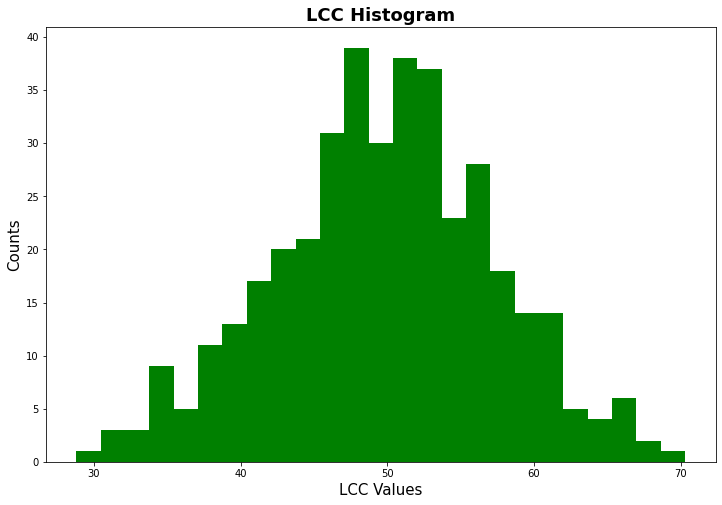

In [33]:
# Histogram of LCC (NOTE: the figure should include x, y labels and figure caption etc.)
plt.figure(figsize =(12,8))
plt.hist(LCC, bins = 25,color='green')
plt.title("LCC Histogram",fontsize=18,weight='bold')
plt.xlabel("LCC Values",fontsize=15)
plt.ylabel("Counts",fontsize=15)


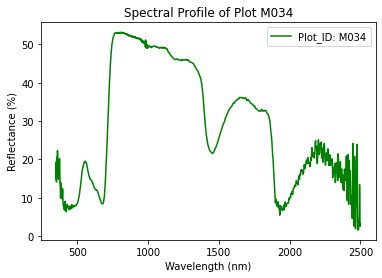

In [87]:
# Display spectral profile of plot M034
M034 = df.loc[df.Plot_ID=="M034"].iloc[:,2:].T
plt.plot(M034,color='g',label='Plot_ID: M034')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance (%)")
plt.title ("Spectral Profile of Plot M034")
plt.legend()


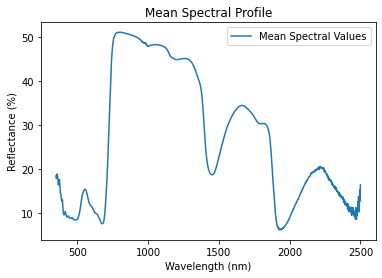

In [93]:
# Display the mean spectral profile of all plots (Hint:get mean values from df.describe() function)
mean_spectral = df.describe().iloc[1,1:]
plt.plot(mean_spectral,label="Mean Spectral Values")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance (%)")
plt.title("Mean Spectral Profile")
plt.legend()



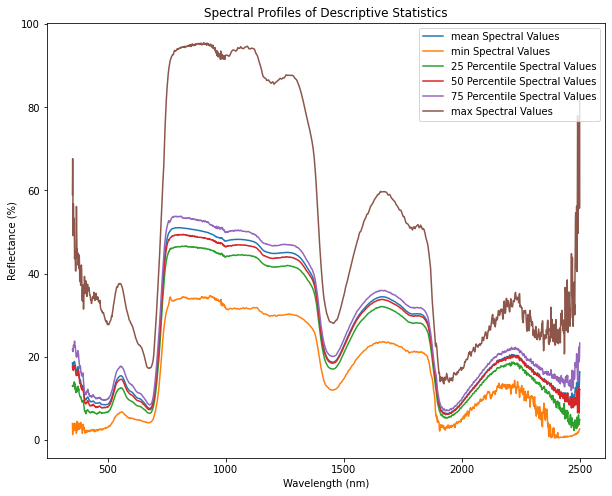

In [122]:
# Display the max, min, mean, 25 Percentile,50 Percentile and 75 Percentile spectral profiles
df_des = df.describe()
plt.figure(figsize =(10,8))
for i in range(len(df_des.index)):
    profile = df.describe().iloc[i,1:]
    if profile.name!="std" and profile.name!="count":
        label_p=profile.name +" Spectral Values"
        if "%" in label_p:
            label_p=label_p.replace("%"," Percentile")
        plt.plot(profile,label=label_p)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance (%)")
plt.title("Spectral Profiles of Descriptive Statistics")
plt.legend()


* NOTE: From the above reflectance curve, it seems like that the data is very noisy on the two ends. Before the wavelength is around 450 nm and after the wavlength of 2000 nm, the data is noisy and we can remove that.
*  Thus,remove the columns which contains wavelength data from 350 - 450 nm and 2001 - 2500 nm.

In [159]:
# Remove the columns which contains wavelength data from 350 - 450 nm and 2001 - 2500 nm
df_copy=df.copy()
removal1 = [i for i in range(350,451)]
removal2 = [j for j in range(2001,2501)]
removals = removal1 + removal2
df_new=df_copy.drop(removals, axis=1)
df_new

Plot_ID   LCC        451        452        453        454        455  \
0      M312  28.8   7.255333   7.386687   7.556061   7.439201   7.295867   
1      M015  30.8   8.120000   7.953938   7.825813   7.935999   7.901468   
2      M108  31.3  10.224000  10.172186  10.876558  10.485603  10.320131   
3      M134  32.1   9.061666   9.264313   9.194938   9.260599   9.414331   
4      M239  32.7   9.127334   9.123939   8.535816   8.730798   8.848268   
..      ...   ...        ...        ...        ...        ...        ...   
388    M383  66.6   9.605667   9.094439   8.801314  10.058392  10.718137   
389    M361  66.7   7.783667   7.901125   7.867375   7.917399   8.017532   
390    M157  67.3   5.164000   5.316937   5.288813   5.392199   5.391534   
391    M107  67.8   9.328667   9.590874  10.184622  10.350800  10.268935   
392    M243  70.3  13.370667  13.384813  13.200438  12.693003  12.195803   

           456        457        458  ...       1991       1992       1993  \
0     7.160534   7.510597   7.652468  ...  10.551023  10.846214  11.141404   
1     7.610135   7.915197   8.130800  ...   8.465146   8.495888   8.526629   
2    10.675465  10.850800  10.834135  ...   9.477895   9.352337   9.226779   
3     9.677666  10.121597  10.424266  ...   9.113436   9.315661   9.517887   
4     8.718934   8.725801   8.995530  ...  11.615879  11.820328  12.024776   
..         ...        ...        ...  ...        ...        ...        ...   
388  10.223470   9.939402   9.667535  ...  12.363375  12.265225  12.167075   
389   8.178865   8.346799   8.330668  ...   7.821512   7.964108   8.106703   
390   5.212868   5.374999   5.415001  ...   7.440258   7.486555   7.532852   
391   9.886269   9.988999   9.918736  ...   6.925165   7.361099   7.797033   
392  11.767803  11.810200  11.996064  ...   6.350560   6.248336   6.146112   

          1994       1995       1996       1997       1998    1999       2000  
0    11.402034  11.628101  11.854169  11.718492  11.427746  11.137  11.036258  
1     8.567356   8.618070   8.668783   8.908507   9.229254   9.550   9.869636  
2     9.116322   9.020967   8.925611   8.978662   9.095331   9.212   9.367558  
3     9.502038   9.268113   9.034188   9.025182   9.112591   9.200   9.005922  
4    12.171285  12.259854  12.348425  12.359446  12.337222  12.315  11.961660  
..         ...        ...        ...        ...        ...     ...        ...  
388  12.123893  12.135678  12.147464  12.178221  12.217110  12.256  12.342298  
389   8.101216   7.947647   7.794078   7.431201   6.978601   6.526   6.654150  
390   7.369218   6.995653   6.622088   6.588033   6.699516   6.811   7.255823  
391   7.976072   7.898216   7.820361   7.789741   7.779371   7.769   8.170488  
392   6.223748   6.481243   6.738739   7.100133   7.506067   7.912   7.992002  

[393 rows x 1552 columns]

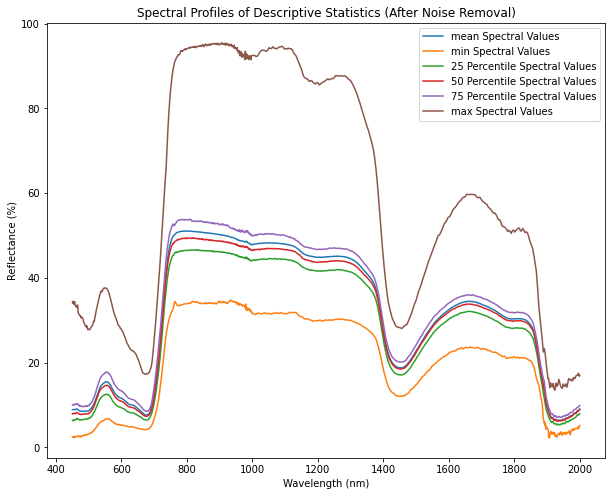

In [163]:
# After remove noisy bands, display the max, min, mean, 25 Percentile,50 Percentile and 75 Percentile spectral profiles
df_new_des = df_new.describe()
plt.figure(figsize =(10,8))
for i in range(len(df_new_des.index)):
    profile = df_new_des.iloc[i,1:]
    if profile.name!="std" and profile.name!="count":
        label_p=profile.name +" Spectral Values"
        if "%" in label_p:
            label_p=label_p.replace("%"," Percentile")
        plt.plot(profile,label=label_p)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance (%)")
plt.title("Spectral Profiles of Descriptive Statistics (After Noise Removal)")
plt.legend()


## 3. ML Model Training and Testing

### 3.1 Training and testing sets split

In [140]:
# Split the 393 data samples ramdonly into traing and testing sets (70%:30%)
from sklearn.model_selection import train_test_split

x = df.iloc[:,2:].values 
y = df.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
type(x_train)

(393, 1551)
(393,)
(275, 1551)
(275,)
(118, 1551)
(118,)


numpy.ndarray

### 3.2 Apply multilinear regression to predict LCC

In [120]:
# Import MLR model
from sklearn.linear_model import LinearRegression 
# Define the model
model = LinearRegression() 
# Training the model via fit fuction
model.fit(x_train,y_train)

LinearRegression()

In [121]:
# Evaluate model using testing dataset
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt (MSE)
R2 = r2_score(y_test,y_pred)

print("MSE: " + str(MSE))
print("RMSE: " + str(RMSE))
print("R2: " + str(R2))

MSE: 40.032539108021325
RMSE: 6.327127239752755
R2: 0.38596474513454126


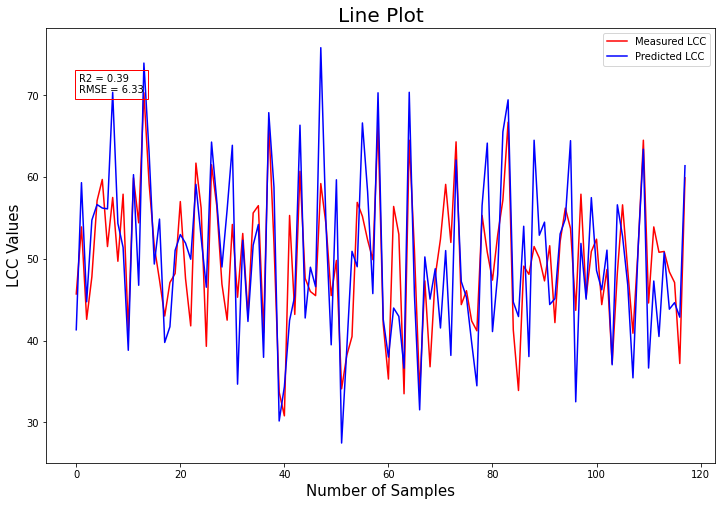

In [137]:
# Line plot of predicted and actural measured values
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(y_test,color = 'r',label='Measured LCC')
ax.plot(y_pred,color = 'b',label='Predicted LCC')
text = r"R2 = %.2f" % (R2);text += "\n"; text += r"RMSE = %.2f" % (RMSE)   
plt.annotate(text, xy=(0.05, 0.85), xycoords='axes fraction',color='black', fontsize=10,bbox=dict(facecolor='none',edgecolor='red'))
ax.set_xlabel('Number of Samples',fontsize = 15)
ax.set_ylabel('LCC Values',fontsize = 15)
ax.set_title("Line Plot",fontsize = 20)
plt.legend()
plt.show()

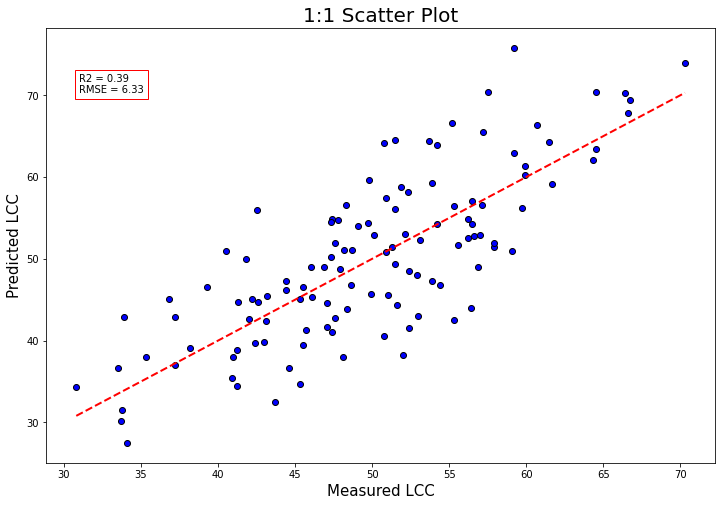

In [136]:
# Scatter plot of predicted and actural measured values
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred, color = 'b', edgecolors = (0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
text = r"R2 = %.2f" % (R2);text += "\n"; text += r"RMSE = %.2f" % (RMSE)   
plt.annotate(text, xy=(0.05, 0.85), xycoords='axes fraction',color='black', fontsize=10,bbox=dict(facecolor='none',edgecolor='red'))
ax.set_xlabel('Measured LCC',fontsize = 15)
ax.set_ylabel('Predicted LCC',fontsize = 15)
ax.set_title("1:1 Scatter Plot",fontsize = 20)
plt.show()

### 3.3 Apply Partial Least Squares Regression to predict LCC

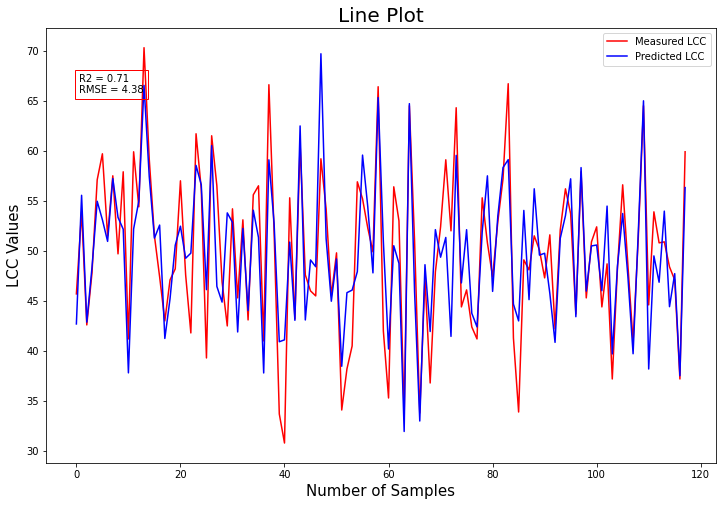

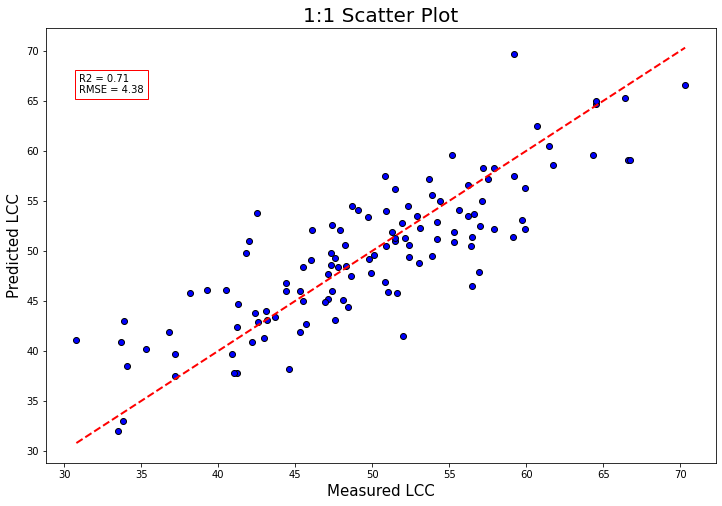

In [157]:
# Your script here





### 3.3 Apply Support Vector Machine Regression to predict LCC

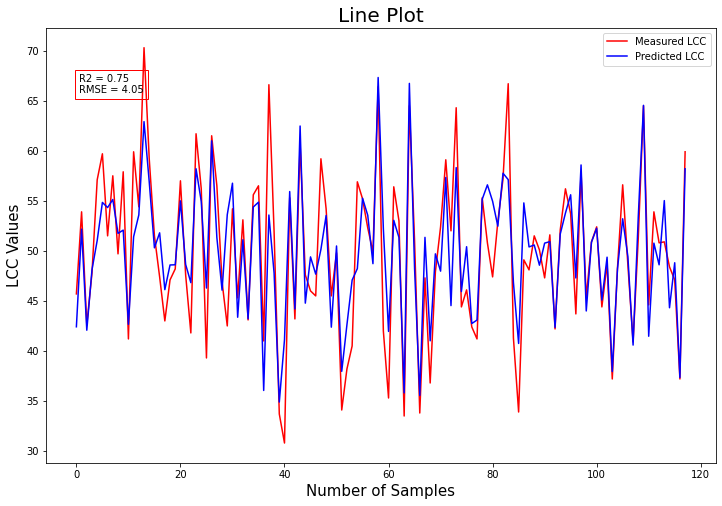

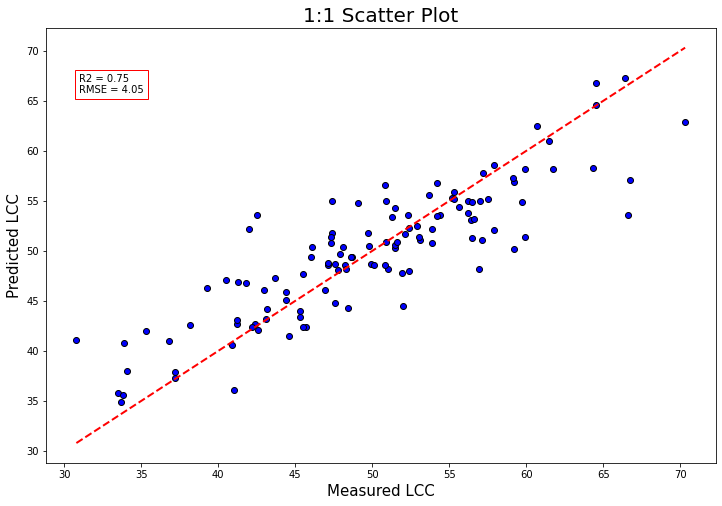

In [169]:
# Your script here








### 3.4 Apply Decision Tree-based Regression to predict LCC

### 3.5 Apply Random Forest Regression to predict LCC 

# 3.6 Calculate Model Evaluation Metrics using Excel for the resutls from Support Vector Regression Method

*Save the prediction results (testing set) from  to excel file, and calculate MAE, MSE, RMSE, RMSE% and R square using excel, and upload your excel file with jupyter notebook file.